## 텍스트 전처리 및 시각화 연습문제

#### 주어진 뉴스기사 데이터를 파악하고, 필요한 컬럼에 대하여 전처리하여 분석하시오.
- 데이터 파일 : 'kor_news_240326.xlsx'

### 1. 필요한 모듈 임포트

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')
from collections import Counter
from konlpy.tag import Okt, Kkma
from wordcloud import WordCloud

### 2. 데이터 읽고 파악하기

In [3]:
kor_news = pd.read_excel('./data/kor_news_240326.xlsx')
kor_news.head()

,식별자,언론사,기고자,제목,분류,본문,URL
0,1,디지털타임스,박순원,"DL이앤씨, 올 매출목표 8.9조 성장 수익성 두 토끼 잡는다",경제>금융_재테크,"DL이앤씨, 안정적 재무구조 바탕으로 수익성 중심 내실경영\n\n\n\n'24년 매...",http://www.dt.co.kr/contents.html?article_no=2...
1,2,디지털타임스,박순원,"한신공영, 정선 임계~동해 신흥 도로건설공사 수주",지역>광주,한신공영이 1373억원 규모의 '국도42호선 정선 임계~동해 신흥 도로건설공사'를 ...,http://www.dt.co.kr/contents.html?article_no=2...
2,3,디지털타임스,박순원,기후카드 충전 편해져요 27일부터 신용카드 가능,경제>금융_재테크,서울시는 오는 27일부터 기후동행카드 실물카드를 신용카드나 체크카드로도 충전할 수 ...,http://www.dt.co.kr/contents.html?article_no=2...
3,4,무등일보,선정태,"""낳기만 하면 지자체가 키운다"" 장기 지원책 꺼내든 전남",사회>여성,2024 무등일보 어젠다 [전남소멸 탈출 보고서-인구회복 대전환 노린다] ③ 출생 ...,http://www.mdilbo.com/detail/NdRj0K/717480
4,5,데일리안,데일리안 김윤일 기자 (eunice@dailian.co.kr),송범진 크리에이터 “배드민턴이 대한민국 최고 인기 스포츠가 되길” [S크리에이터①],스포츠>올림픽_아시안게임,"대한배드민턴협회가 지난해 발표한 자료에 따르면, 전국에 배드민턴을 즐기는 동호인 수...",NaN


In [4]:
kor_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19425 entries, 0 to 19424
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   식별자     19425 non-null  int64 
 1   언론사     19425 non-null  object
 2   기고자     18452 non-null  object
 3   제목      19425 non-null  object
 4   분류      19425 non-null  object
 5   본문      19425 non-null  object
 6   URL     18091 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.0+ MB


In [5]:
kor_news['분류'].isna().value_counts()

분류
False    19425
Name: count, dtype: int64

### 3. 분야별로 뉴스 데이터 구분하기

- '분류' 컬럼을 정제하고 전처리하여 뉴스 분류 키워드들(예. 경제, 사회, 문화, 스포츠 등)을 추출하고,
- 분류한 키워드를 기준으로 각 뉴스를 구분하는 '구분' 컬럼을 생성

In [6]:
kor_news['분류'].isna().value_counts()
kor_news['분류'].unique()

array(['경제>금융_재테크', '지역>광주', '사회>여성', '스포츠>올림픽_아시안게임', '경제>취업_창업', '미분류',
       '경제>부동산', '문화>방송_연예', '경제>경제일반', '사회>사건_사고', '스포츠>축구', '사회>의료_건강',
       '정치>국회_정당', 'IT_과학>인터넷_SNS', '지역>울산', '경제>유통', '문화>요리_여행', '지역>충남',
       '사회>교육_시험', '문화>전시_공연', '문화>문화일반', '문화>음악', '사회>노동_복지', '지역>대전',
       '사회>장애인', '문화>출판', '경제>반도체', '경제>자원', '정치>청와대', '정치>정치일반',
       'IT_과학>과학', '국제>미국_북미', '경제>자동차', 'IT_과학>콘텐츠', '경제>산업_기업',
       '국제>아시아', 'IT_과학>보안', '사회>미디어', '지역>강원', '문화>영화', '지역>충북', '문화>생활',
       '경제>서비스_쇼핑', '국제>중국', '사회>날씨', '지역>경남', 'IT_과학>모바일', '정치>선거',
       '국제>일본', 'IT_과학>IT_과학일반', '문화>미술_건축', '경제>외환', '국제>중동_아프리카',
       '지역>대구', '지역>부산', '정치>행정_자치', '경제>증권_증시', '지역>전남', '지역>경기',
       '사회>사회일반', '지역>전북', '국제>유럽_EU', '정치>북한', '경제>국제경제', '정치>외교',
       '경제>무역', '사회>환경', '스포츠>스포츠일반', '스포츠>야구>메이저리그', '국제>중남미',
       '문화>학술_문화재', '스포츠>농구_배구', '지역>제주', '스포츠>골프', '스포츠>야구', '국제>러시아',
       '지역>지역일반', '국제>국제일반', '스포츠>축구>해외축구', '스포츠>야구>한국프로야구', '스포츠>월드컵',
       '지역>경북', '스

In [7]:
category = list(kor_news['분류'])
len(category)

19425

In [8]:
kor_news['분류리스트'] = kor_news['분류'].str.split('>')
cat_n = kor_news['분류리스트'].apply(lambda x:len(x))
cat_n.max(), cat_n.min()

(3, 1)

In [9]:
kor_news['대분류'] = kor_news['분류리스트'].str[0]
kor_news['중분류'] = kor_news['분류리스트'].str[1]
kor_news['소분류'] = kor_news['분류리스트'].str[2]

In [10]:
import re
result = []
for cat in kor_news['분류']:
    if re.search(r'>', cat):
        result.append(cat[:re.search(r'>', cat).start(0)])
    else:
        result.append(cat)
        
kor_news['구분'] = result
len(result)

19425

In [11]:
kor_news['구분'] = result
kor_news

,식별자,언론사,기고자,제목,분류,본문,URL,분류리스트,대분류,중분류,소분류,구분
0,1,디지털타임스,박순원,"DL이앤씨, 올 매출목표 8.9조 성장 수익성 두 토끼 잡는다",경제>금융_재테크,"DL이앤씨, 안정적 재무구조 바탕으로 수익성 중심 내실경영\n\n\n\n'24년 매...",http://www.dt.co.kr/contents.html?article_no=2...,"[경제, 금융_재테크]",경제,금융_재테크,NaN,경제
1,2,디지털타임스,박순원,"한신공영, 정선 임계~동해 신흥 도로건설공사 수주",지역>광주,한신공영이 1373억원 규모의 '국도42호선 정선 임계~동해 신흥 도로건설공사'를 ...,http://www.dt.co.kr/contents.html?article_no=2...,"[지역, 광주]",지역,광주,NaN,지역
2,3,디지털타임스,박순원,기후카드 충전 편해져요 27일부터 신용카드 가능,경제>금융_재테크,서울시는 오는 27일부터 기후동행카드 실물카드를 신용카드나 체크카드로도 충전할 수 ...,http://www.dt.co.kr/contents.html?article_no=2...,"[경제, 금융_재테크]",경제,금융_재테크,NaN,경제
3,4,무등일보,선정태,"""낳기만 하면 지자체가 키운다"" 장기 지원책 꺼내든 전남",사회>여성,2024 무등일보 어젠다 [전남소멸 탈출 보고서-인구회복 대전환 노린다] ③ 출생 ...,http://www.mdilbo.com/detail/NdRj0K/717480,"[사회, 여성]",사회,여성,NaN,사회
4,5,데일리안,데일리안 김윤일 기자 (eunice@dailian.co.kr),송범진 크리에이터 “배드민턴이 대한민국 최고 인기 스포츠가 되길” [S크리에이터①],스포츠>올림픽_아시안게임,"대한배드민턴협회가 지난해 발표한 자료에 따르면, 전국에 배드민턴을 즐기는 동호인 수...",NaN,"[스포츠, 올림픽_아시안게임]",스포츠,올림픽_아시안게임,NaN,스포츠
...,...,...,...,...,...,...,...,...,...,...,...,...
19420,19421,전북일보,엄철호,제1회 익산시체육회장배 동호인 한마음 축구대회 개막,스포츠>축구,지난 23일 금마축구장에서 개막한 제1회 익산시체육회장배 동호인 한마음 축구대회 참...,https://www.jjan.kr/article/20240325580030,"[스포츠, 축구]",스포츠,축구,NaN,스포츠
19421,19422,전북일보,김원용,"서남용 완주군의장, 완주군청 근대5종 선수단 격려",스포츠>올림픽_아시안게임,사진제공=완주군의회 서남용 완주군의회 의장이 25일 의회 의장실에서 ‘제41회 회장...,https://www.jjan.kr/article/20240325580034,"[스포츠, 올림픽_아시안게임]",스포츠,올림픽_아시안게임,NaN,스포츠
19422,19423,전북일보,이용수,[정년 연장의 '빛과 그림자'] (하)대안은 있나 - 노사정 대타협이 '열쇠',사회>노동_복지,나이를 먹는 게 죄라면 모든 사람은 죄인이다. 아직 젊으니 '늙어가는 사회'는 남의...,https://www.jjan.kr/article/20240320580001,"[사회, 노동_복지]",사회,노동_복지,NaN,사회
19423,19424,전북일보,기고,정년연장 이젠 정부가 나서야 할 당면 과제,경제>산업_기업,권기봉 한국노총 전북지역본부 의장 우리나라는 현재 급속한 인구구조의 고령화 현상을 ...,https://www.jjan.kr/article/20240320580009,"[경제, 산업_기업]",경제,산업_기업,NaN,경제


### 4. '제목' 컬럼 데이터 전처리 및 시각화

- 제목 컬럼 데이터를 전처리하고
- 빈도가 높은 키워드를 추출하여
- 막대그래프와 워드클라우드로 시각화

In [12]:
tit = list(kor_news['제목'])
title = ', '.join(tit)

In [13]:
#형태소 분석
from konlpy.tag import Okt
okt = Okt()
token_tag = okt.pos(title)

print(token_tag[:100])

[('DL', 'Alpha'), ('이', 'Determiner'), ('앤', 'Noun'), ('씨', 'Suffix'), (',', 'Punctuation'), ('올', 'Verb'), ('매출', 'Noun'), ('목표', 'Noun'), ('8.9조', 'Number'), ('성장', 'Noun'), ('수익', 'Noun'), ('성', 'Suffix'), ('두', 'Noun'), ('토끼', 'Noun'), ('잡는다', 'Verb'), (',', 'Punctuation'), ('한', 'Determiner'), ('신', 'Modifier'), ('공영', 'Noun'), (',', 'Punctuation'), ('정선', 'Noun'), ('임계', 'Noun'), ('~', 'Punctuation'), ('동해', 'Noun'), ('신흥', 'Noun'), ('도로', 'Noun'), ('건설', 'Noun'), ('공사', 'Noun'), ('수주', 'Noun'), (',', 'Punctuation'), ('기후', 'Noun'), ('카드', 'Noun'), ('충전', 'Noun'), ('편해져요', 'Adjective'), ('27일', 'Number'), ('부터', 'Foreign'), ('신용카드', 'Noun'), ('가능', 'Noun'), (',', 'Punctuation'), ('"', 'Punctuation'), ('낳기만', 'Verb'), ('하면', 'Verb'), ('지자체', 'Noun'), ('가', 'Josa'), ('키운다', 'Verb'), ('"', 'Punctuation'), ('장기', 'Noun'), ('지원', 'Noun'), ('책', 'Noun'), ('꺼내든', 'Verb'), ('전남', 'Noun'), (',', 'Punctuation'), ('송범', 'Noun'), ('진', 'Noun'), ('크리에이터', 'Noun'), ('“', 'Foreign'), ('배드민턴', '

In [14]:
#한글자 제외, #명사만 남기기
token_list = [token for token, tag in token_tag 
              if (len(token)>1) and (tag == 'Noun')]
print(token_list[:100])

['매출', '목표', '성장', '수익', '토끼', '공영', '정선', '임계', '동해', '신흥', '도로', '건설', '공사', '수주', '기후', '카드', '충전', '신용카드', '가능', '지자체', '장기', '지원', '전남', '송범', '크리에이터', '배드민턴', '대한민국', '최고', '인기', '스포츠', '크리에이터', '희망', '상가', '공급', '청년', '대상', '송영', '한미', '회장', '아들', '후계', '장녀', '임주현', '분양', '신도시', '사비', '폭탄', '여배우', '대세', '박지현', '김지원', '돌파구', '에듀', '테크', '새봄', '웅진', '대표', '실적', '반등', '몰카', '오히려', '증거', '무혐의', '물뽕', '마약', '사건', '전말', '디펜딩', '챔피언', '변상일', '연패', '조준', '춘란배', '강전', '유창혁', '연패', '시동', '백전노장', '승부', '대주배', '개막', '왕세자', '비도', '투병', '고백', '영국', '이하', '환자', '폭증', '미스터리', '민주당', '지역구', '후보자', '라인', '전수', '조사', '친윤', '불패', '국민', '지역구']


In [15]:
count = Counter(token_list)
def data_frame(list):
    df = pd.DataFrame(pd.Series(list), columns=['Freq'])
    df = df.sort_values(by='Freq', ascending=False)
    return df
data_frame(count)

,Freq
포토,753
지원,631
사업,622
총선,587
개최,534
...,...
수책,1
극우,1
유대,1
집밥,1


In [16]:
# const = okt.nouns(str) #전처리

In [17]:
def word_count(column_name):
    cont = list(kor_news[column_name])
    content = ', '.join(cont)
    okt = Okt()
    token_tag = okt.pos(content)
    token_list = [token for token, tag in token_tag 
              if (len(token)>1) and (tag == 'Noun')]
    count = Counter(token_list)
    df = pd.DataFrame(pd.Series(count), columns=['Freq'])
    df = df.sort_values(by='Freq', ascending=False)
    return df
    
df = word_count('제목')
df

,Freq
포토,753
지원,631
사업,622
총선,587
개최,534
...,...
수책,1
극우,1
유대,1
집밥,1


In [18]:
cont = list(kor_news[kor_news['구분']=='경제']['제목'])
content = ' '.join(cont)
content

'DL이앤씨, 올 매출목표 8.9조 성장 수익성 두 토끼 잡는다 기후카드 충전 편해져요 27일부터 신용카드 가능 LH, 희망상가 307호 공급 청년 경단녀 등 대상 분양가 5억에서 1억 더 오른다고? 3기 신도시 덮친 공사비 폭탄 돌파구는 \'에듀테크\'? 윤새봄 웅진 대표, 실적 반등 성공할까 [노종화의 기업 파인더] 동학개미한테 ‘주주제안 문턱’은 넘사벽 "나도 평균은 버는데` 그래도 서울서 살수 있는 아파트는 100채중 6채 <중도초대석> 이홍준 세종일자리경제진흥원 원장 "시민과 기업이 찾는 조직으로 키울 것" 매출 1위까지 넘보는 CU GS25 초긴장 [맞수맞짱] 과천지식정보타운 지식산업센터, 3년 후 제2 판교 기대한다는데 [감평사의 부동산 현장진단] ‘레티보’ 날개 단 휴젤 얼마나 날아오를까 130조 시장 겨냥 불붙은 비만 치료제 ETF 이은미 토스뱅크 대표 내정자, 재무 전략 ‘양수겸장’ 국내 네 번째 女 행장 [CEO 라운지] 엔비디아만 보시나요? 우리도 있어요 “기름값 오르니 ‘이 종목’ 불붙었네” 실적 전망도 밝다는데 “그만 좀 우려먹어라” 사골車 욕했는데 타는 순간, 아빠도 오빠된다 [카슐랭] 삼성증권, 슈퍼리치 자산관리 명가 신한 PWM, 독창적 금융 파트너 서비스로 자산관리 시장 주도 롯데면세점, 세계 1위 창이공항에 국내 1위 롯데면세점 깃발 꽂다 "통계조작 때문에 재건축 부담금 못 믿겠다" 싸구려 빵의 대변신 ‘빵집 규제’에 아침마다 편의점이 붐빈다는데 “쫓겨났던 사장님 칼 갈았대”...6700억원 들고온 ‘이 남자’ 위워크 다시 산다 [Cover Story] ‘키즈?어른이?신중년’...신(新)도시인의 탄생 “독주 더이상 못봐주겠네” 엔비디아 맞서 ‘3인방’ 손 맞잡았다는데 B2B 인테리어 플랫폼 ‘나야’, 영세 시공사 무료 지원 “할멈, 건넛집 할멈은 혼자 산대”...역대 최대 노인 가구도 ‘싱글족’이 대세 아시아 태평양서 가장 일하기 좋은 컨설팅펌 1위 베인, 2위 커니 쉿! 직장인 절반 넘게 ‘조용한 퇴사’ 중 “강북판 테헤란로

In [19]:
def word_count(column_name, cat_name):
    cont = list(kor_news[kor_news['구분']==cat_name][column_name])
    content = ' '.join(cont)
    okt = Okt()
    token_tag = okt.pos(content)
    token_list = [token for token, tag in token_tag 
              if (len(token)>1) and (tag == 'Noun')]
    count = Counter(token_list)
    df = pd.DataFrame(pd.Series(count), columns=['Freq'])
    df = df.sort_values(by='Freq', ascending=False)
    return df
    
df = word_count('제목', '경제')
df

,Freq
투자,167
기업,159
산업,157
브랜드,155
한국,154
...,...
폰용,1
홋스퍼,1
밀알,1
찌개,1


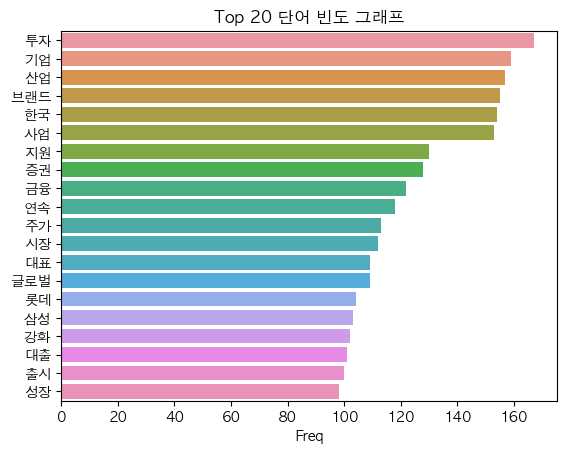

In [20]:
def top_words(df, max_word):
    df = df.iloc[:max_word]
    sns.barplot(data=df, x='Freq', y=df.index)
    plt.title(f'Top {max_word} 단어 빈도 그래프')
    plt.show()
    
top_words(df, 20)

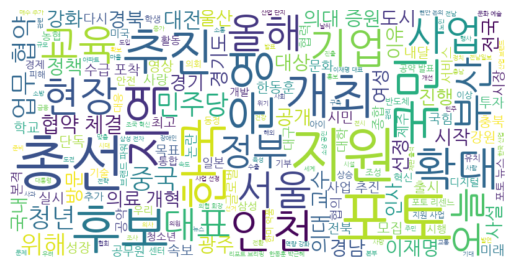

In [21]:
cont = list(kor_news['제목'])
content = ', '.join(cont)
okt = Okt()
token_tag = okt.pos(content)
token_list = [token for token, tag in token_tag 
            if (len(token)>1) and (tag == 'Noun')]
tokens_list = ', '.join(token_list)

fontpath = '/Users/crystal.moon/Library/Fonts/NanumGothic.ttf'
wordcloud = WordCloud(font_path=fontpath,
                      max_font_size = 100,
                      width = 800,
                      height = 400,
                      background_color='white'
                     ).generate(tokens_list)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [23]:
result = []
for i in range(30):
    tags = Okt().pos(kor_news.제목[i], stem=True)
    for word, tag in tags:
        if tag not in ['Punctuation', 'Suffix', 'Josa', 'Number', 'Foreign']:
            result.append((word, tag))
result

[('DL', 'Alpha'),
 ('이', 'Determiner'),
 ('앤', 'Noun'),
 ('오다', 'Verb'),
 ('매출', 'Noun'),
 ('목표', 'Noun'),
 ('성장', 'Noun'),
 ('수익', 'Noun'),
 ('두', 'Noun'),
 ('토끼', 'Noun'),
 ('잡다', 'Verb'),
 ('한', 'Determiner'),
 ('신', 'Modifier'),
 ('공영', 'Noun'),
 ('정선', 'Noun'),
 ('임계', 'Noun'),
 ('동해', 'Noun'),
 ('신흥', 'Noun'),
 ('도로', 'Noun'),
 ('건설', 'Noun'),
 ('공사', 'Noun'),
 ('수주', 'Noun'),
 ('기후', 'Noun'),
 ('카드', 'Noun'),
 ('충전', 'Noun'),
 ('편하다', 'Adjective'),
 ('신용카드', 'Noun'),
 ('가능', 'Noun'),
 ('낳다', 'Verb'),
 ('하다', 'Verb'),
 ('지자체', 'Noun'),
 ('키우다', 'Verb'),
 ('장기', 'Noun'),
 ('지원', 'Noun'),
 ('책', 'Noun'),
 ('꺼내다', 'Verb'),
 ('전남', 'Noun'),
 ('송범', 'Noun'),
 ('진', 'Noun'),
 ('크리에이터', 'Noun'),
 ('배드민턴', 'Noun'),
 ('대한민국', 'Noun'),
 ('최고', 'Noun'),
 ('인기', 'Noun'),
 ('스포츠', 'Noun'),
 ('되다', 'Verb'),
 ('S', 'Alpha'),
 ('크리에이터', 'Noun'),
 ('LH', 'Alpha'),
 ('희망', 'Noun'),
 ('상가', 'Noun'),
 ('호', 'Noun'),
 ('공급', 'Noun'),
 ('청년', 'Noun'),
 ('경', 'Modifier'),
 ('단', 'Modifier'),
 ('녀', 'No

### 5. '본문' 컬럼 데이터 전처리 및 시각화

- 본문 컬럼 데이터를 전처리하고
- 빈도가 높은 키워드를 추출하여
- 막대그래프와 워드클라우드로 시각화

In [24]:
def word_count(column_name):
    cont = list(kor_news[column_name])
    content = ', '.join(cont)
    okt = Okt()
    token_tag = okt.pos(content)
    token_list = [token for token, tag in token_tag 
              if (len(token)>1) and (tag == 'Noun')]
    count = Counter(token_list)
    df = pd.DataFrame(pd.Series(count), columns=['Freq'])
    df = df.sort_values(by='Freq', ascending=False)
    return df
    
df2 = word_count('본문')
df2

,Freq
기자,5259
서울,3654
사업,3629
지역,3229
지난,3183
...,...
점심식사,1
프레디,1
폴리시,1
체킹,1


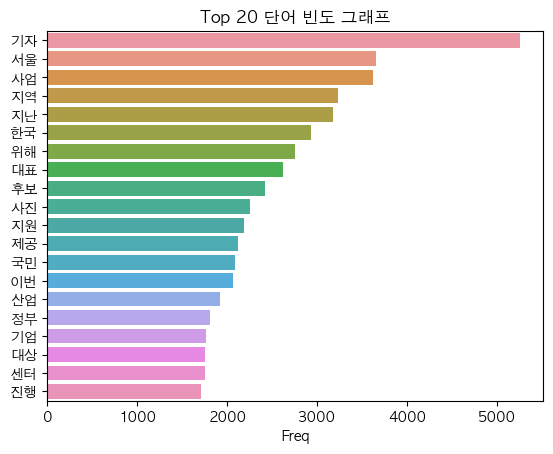

In [25]:
def top_words(df, max_word):
    df = df.iloc[:max_word]
    sns.barplot(data=df, x='Freq', y=df.index)
    plt.title(f'Top {max_word} 단어 빈도 그래프')
    plt.show()
    
top_words(df2, 20)

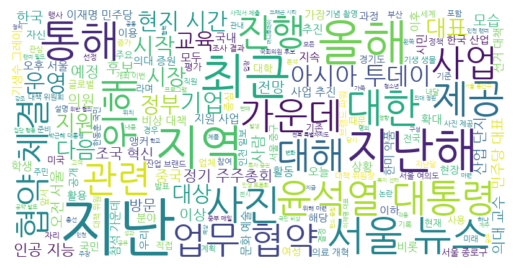

In [26]:
cont = list(kor_news['본문'])
content = ', '.join(cont)
okt = Okt()
token_tag = okt.pos(content)
token_list = [token for token, tag in token_tag 
            if (len(token)>1) and (tag == 'Noun')]
tokens_list = ', '.join(token_list)

fontpath = '/Users/crystal.moon/Library/Fonts/NanumGothic.ttf'
wordcloud = WordCloud(font_path=fontpath,
                      max_font_size = 100,
                      width = 800,
                      height = 400,
                      background_color='white'
                     ).generate(tokens_list)

plt.axis('off')
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

----

In [27]:
df = pd.read_excel('data/kor_news_240326.xlsx')
df.head()

,식별자,언론사,기고자,제목,분류,본문,URL
0,1,디지털타임스,박순원,"DL이앤씨, 올 매출목표 8.9조 성장 수익성 두 토끼 잡는다",경제>금융_재테크,"DL이앤씨, 안정적 재무구조 바탕으로 수익성 중심 내실경영\n\n\n\n'24년 매...",http://www.dt.co.kr/contents.html?article_no=2...
1,2,디지털타임스,박순원,"한신공영, 정선 임계~동해 신흥 도로건설공사 수주",지역>광주,한신공영이 1373억원 규모의 '국도42호선 정선 임계~동해 신흥 도로건설공사'를 ...,http://www.dt.co.kr/contents.html?article_no=2...
2,3,디지털타임스,박순원,기후카드 충전 편해져요 27일부터 신용카드 가능,경제>금융_재테크,서울시는 오는 27일부터 기후동행카드 실물카드를 신용카드나 체크카드로도 충전할 수 ...,http://www.dt.co.kr/contents.html?article_no=2...
3,4,무등일보,선정태,"""낳기만 하면 지자체가 키운다"" 장기 지원책 꺼내든 전남",사회>여성,2024 무등일보 어젠다 [전남소멸 탈출 보고서-인구회복 대전환 노린다] ③ 출생 ...,http://www.mdilbo.com/detail/NdRj0K/717480
4,5,데일리안,데일리안 김윤일 기자 (eunice@dailian.co.kr),송범진 크리에이터 “배드민턴이 대한민국 최고 인기 스포츠가 되길” [S크리에이터①],스포츠>올림픽_아시안게임,"대한배드민턴협회가 지난해 발표한 자료에 따르면, 전국에 배드민턴을 즐기는 동호인 수...",NaN


In [28]:
import re
result = []
for cat in df['분류']:
    if re.search(r'>', cat):
        result.append(cat[:re.search(r'>', cat).start()])
    else:
        result.append(cat)
        
df['대분류'] = result
len(result)
df

,식별자,언론사,기고자,제목,분류,본문,URL,대분류
0,1,디지털타임스,박순원,"DL이앤씨, 올 매출목표 8.9조 성장 수익성 두 토끼 잡는다",경제>금융_재테크,"DL이앤씨, 안정적 재무구조 바탕으로 수익성 중심 내실경영\n\n\n\n'24년 매...",http://www.dt.co.kr/contents.html?article_no=2...,경제
1,2,디지털타임스,박순원,"한신공영, 정선 임계~동해 신흥 도로건설공사 수주",지역>광주,한신공영이 1373억원 규모의 '국도42호선 정선 임계~동해 신흥 도로건설공사'를 ...,http://www.dt.co.kr/contents.html?article_no=2...,지역
2,3,디지털타임스,박순원,기후카드 충전 편해져요 27일부터 신용카드 가능,경제>금융_재테크,서울시는 오는 27일부터 기후동행카드 실물카드를 신용카드나 체크카드로도 충전할 수 ...,http://www.dt.co.kr/contents.html?article_no=2...,경제
3,4,무등일보,선정태,"""낳기만 하면 지자체가 키운다"" 장기 지원책 꺼내든 전남",사회>여성,2024 무등일보 어젠다 [전남소멸 탈출 보고서-인구회복 대전환 노린다] ③ 출생 ...,http://www.mdilbo.com/detail/NdRj0K/717480,사회
4,5,데일리안,데일리안 김윤일 기자 (eunice@dailian.co.kr),송범진 크리에이터 “배드민턴이 대한민국 최고 인기 스포츠가 되길” [S크리에이터①],스포츠>올림픽_아시안게임,"대한배드민턴협회가 지난해 발표한 자료에 따르면, 전국에 배드민턴을 즐기는 동호인 수...",NaN,스포츠
...,...,...,...,...,...,...,...,...
19420,19421,전북일보,엄철호,제1회 익산시체육회장배 동호인 한마음 축구대회 개막,스포츠>축구,지난 23일 금마축구장에서 개막한 제1회 익산시체육회장배 동호인 한마음 축구대회 참...,https://www.jjan.kr/article/20240325580030,스포츠
19421,19422,전북일보,김원용,"서남용 완주군의장, 완주군청 근대5종 선수단 격려",스포츠>올림픽_아시안게임,사진제공=완주군의회 서남용 완주군의회 의장이 25일 의회 의장실에서 ‘제41회 회장...,https://www.jjan.kr/article/20240325580034,스포츠
19422,19423,전북일보,이용수,[정년 연장의 '빛과 그림자'] (하)대안은 있나 - 노사정 대타협이 '열쇠',사회>노동_복지,나이를 먹는 게 죄라면 모든 사람은 죄인이다. 아직 젊으니 '늙어가는 사회'는 남의...,https://www.jjan.kr/article/20240320580001,사회
19423,19424,전북일보,기고,정년연장 이젠 정부가 나서야 할 당면 과제,경제>산업_기업,권기봉 한국노총 전북지역본부 의장 우리나라는 현재 급속한 인구구조의 고령화 현상을 ...,https://www.jjan.kr/article/20240320580009,경제


In [29]:
df['대분류'].unique()

array(['경제', '지역', '사회', '스포츠', '미분류', '문화', '정치', 'IT_과학', '국제'],
      dtype=object)

In [30]:
len(df[(df['대분류']=='경제')])

4262

In [31]:
data = {cat : (len(df[(df['대분류']==cat)])) for cat in list(df['대분류'].unique())}
data

{'경제': 4262,
 '지역': 4974,
 '사회': 2618,
 '스포츠': 889,
 '미분류': 439,
 '문화': 1914,
 '정치': 2365,
 'IT_과학': 1121,
 '국제': 843}

In [32]:
df2 = pd.DataFrame(list(data.items()), columns=['category', 'value'])
df2.set_index(['category'], inplace=True)

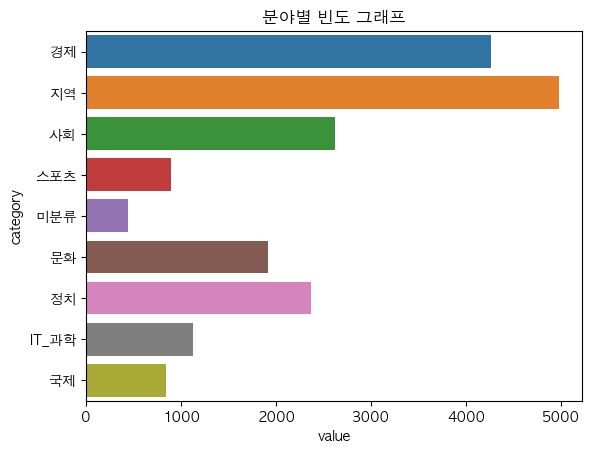

In [33]:
df = pd.read_excel('data/kor_news_240326.xlsx')
df.head()

import re
result = []
for cat in df['분류']:
    if re.search(r'>', cat):
        result.append(cat[:re.search(r'>', cat).start()])
    else:
        result.append(cat)
        
df['대분류'] = result
data = {cat : (len(df[(df['대분류']==cat)])) for cat in list(df['대분류'].unique())}
df2 = pd.DataFrame(list(data.items()), columns=['category', 'value'])
df2.set_index(['category'], inplace=True)
sns.barplot(data=df2, x='value', y=df2.index)
plt.title(f'분야별 빈도 그래프')
plt.show()

Text(0.5, 1.0, '경제 Top 20 단어 빈도 그래프')

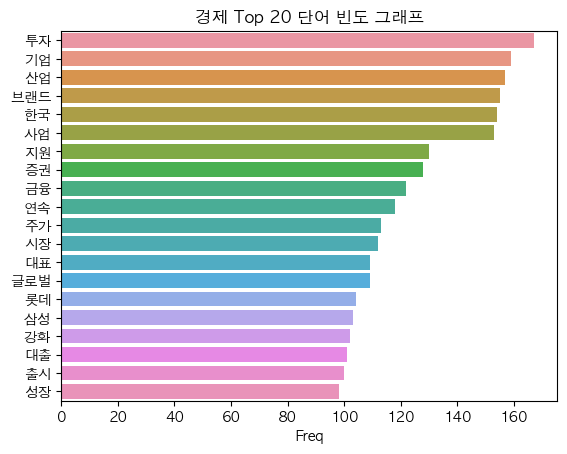

In [34]:
def word_count(column_name, cat_name):
    cont = list(df[df['대분류'] == cat_name][column_name])
    content = ' '.join(cont)
    okt = Okt()
    token_tag = okt.pos(content)
    token_list = [token for token, tag in token_tag
                  if (len(token) > 1) and (tag == 'Noun')]
    count = Counter(token_list)
    df1 = pd.DataFrame(pd.Series(count), columns=['Freq'])
    df1 = df1.sort_values(by='Freq', ascending=False)
    return df1


df1 = word_count('제목', '경제')
df3 = df1.iloc[:20]

sns.barplot(data=df3, x='Freq', y=df3.index)
plt.title(f'경제 Top 20 단어 빈도 그래프')

Text(0.5, 1.0, 'Top 사회 20 단어 빈도 그래프')

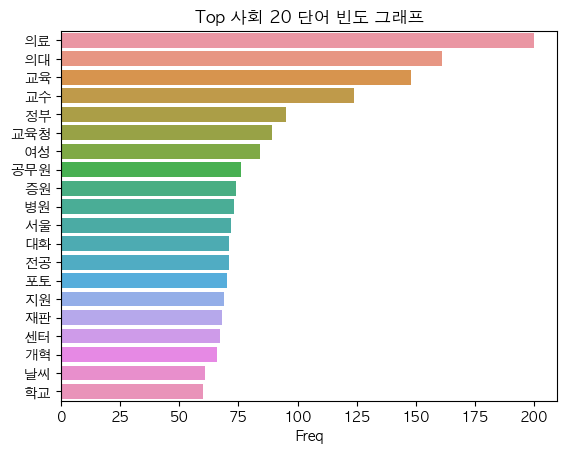

In [35]:
def word_count(column_name, cat_name):
    cont = list(df[df['대분류'] == cat_name][column_name])
    content = ' '.join(cont)
    okt = Okt()
    token_tag = okt.pos(content)
    token_list = [token for token, tag in token_tag
                  if (len(token) > 1) and (tag == 'Noun')]
    count = Counter(token_list)
    df1 = pd.DataFrame(pd.Series(count), columns=['Freq'])
    df1 = df1.sort_values(by='Freq', ascending=False)
    return df1


df1 = word_count('제목', '사회')
df3 = df1.iloc[:20]

sns.barplot(data=df3, x='Freq', y=df3.index)
plt.title(f'Top 사회 20 단어 빈도 그래프')